# Part I a): Points in High Dimensional Space

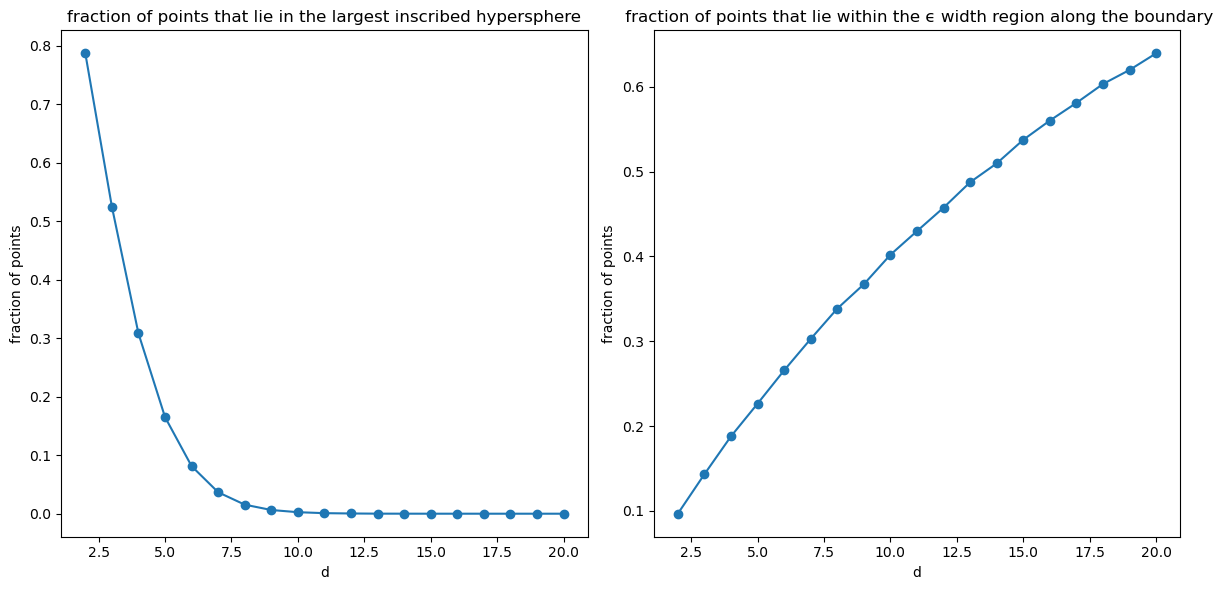

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n = 100000
dim = range(2, 21)
epi = 0.1

sphere = []
bound = []

for d in dim:
    points = np.random.uniform(-1, 1, size=(n, d))    
    distances = np.linalg.norm(points, axis=1)
    
    i = np.sum(distances <= 1)
    i = i/n
    sphere.append(i)

    o = np.sum(np.any(points > (1 - epi), axis=1)) / n
    bound.append(o)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(dim, sphere, marker='o')
plt.title("fraction of points that lie in the largest inscribed hypersphere")
plt.xlabel("d")
plt.ylabel("fraction of points")
plt.subplot(1, 2, 2)
plt.plot(dim, bound, marker='o')
plt.title(" fraction of points that lie within the ϵ width region along the boundary")
plt.xlabel("d")
plt.ylabel("fraction of points")

plt.tight_layout()
plt.show()

trend 1: the fraction of points that lie in the largest inscribed hypersphere within the hypercube decreases as the number of dimensions increase.

trend 2: the fraction of points that lie within the ϵ width region along the boundary of the hypercube increases as the number of dimensions increase.

# Part I b): High Dimensional Normal Distribution

d=10:
mean : 3.083175188413824 approx sqrt(d): 3.1622776601683795
standard deviation :  0.686133838416503 approx 1/sqrt(2): 0.7071067811865475
d=50:
mean : 7.039434807475398 approx sqrt(d): 7.0710678118654755
standard deviation :  0.695931401304227 approx 1/sqrt(2): 0.7071067811865475
d=100:
mean : 9.989816908147798 approx sqrt(d): 10.0
standard deviation :  0.7050233665132473 approx 1/sqrt(2): 0.7071067811865475
d=500:
mean : 22.356784039885657 approx sqrt(d): 22.360679774997898
standard deviation :  0.7125471614416483 approx 1/sqrt(2): 0.7071067811865475


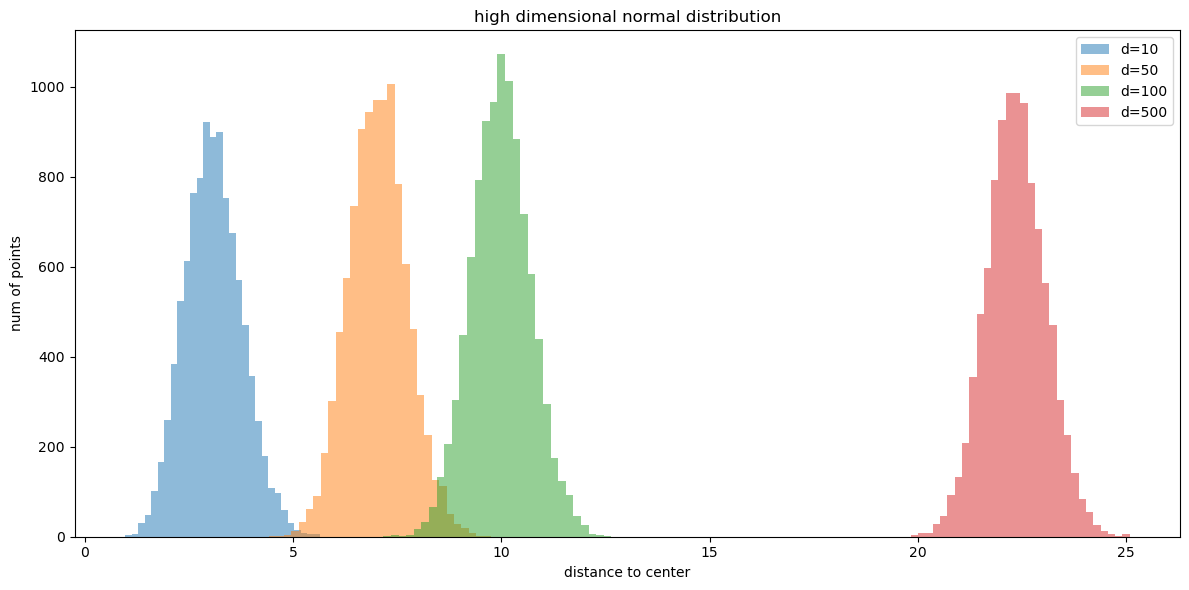

In [28]:
dimensions = [10, 50, 100, 500]
n = 10000

mean = []
std = []
distance = []

for d in dimensions:
    samples = np.random.multivariate_normal(mean=np.zeros(d), cov=np.eye(d), size=n)
    
    distances = np.linalg.norm(samples, axis=1)
    distance.append(distances)
    
    meant = np.mean(distances)
    mean.append(meant)   
    stdt = np.std(distances)   
    std.append(stdt)

for i, d in enumerate(dimensions):
    print(f"d={d}:")
    print(f"mean : {mean[i]} approx sqrt(d): {np.sqrt(d)}")
    print(f"standard deviation :  {std[i]} approx 1/sqrt(2): {1/np.sqrt(2)}")

plt.figure(figsize=(12, 6))
plt.title("high dimensional normal distribution")

for i, d in enumerate(dimensions):
    plt.hist(distance[i], bins=30, alpha=0.5, label=f'd={d}')

plt.xlabel('distance to center')
plt.ylabel('num of points')
plt.legend()
plt.tight_layout()
plt.show()


# Part II: Linear Regression via QR Factorization

In [9]:
import pandas as pd
data = pd.read_csv("winequality-red.csv", delimiter=";")
import numpy as np
X = np.array([[1,-2], [-2,3], [2,-5], [3,0]])
Y = np.array([3,1,-2,-1])
# X = data.iloc[:, :-1]  
# Y = data.iloc[:, -1]

# X = X.to_numpy()
# Y = Y.to_numpy()
print(X)
print(Y)
n = X.shape[0]
d = X.shape[1] + 1

X = np.hstack((np.ones((X.shape[0], 1)), X))
Q = np.zeros((n, d))
R = np.zeros((d, d))

for j in range(d):
        v = X[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], X[:, j])
            v -= R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]
#VERIFY  
# Q1, R1 = np.linalg.qr(X)
# print(Q1[:, :-1].shape)
# print(Q)
# print("break")
# print(Q1)

inv = np.linalg.inv(R)
print(inv)
print(np.dot(Q.T, Y))
w = inv.dot(np.dot(Q.T, Y))
print("w: ",w)

m = np.mean(Y)
centered = Y-m
TSS = np.sum(centered**2)

y_hat = np.dot(X, w)
SSE = np.sum((Y - y_hat) ** 2)
print("SSE: ", SSE)

R2 = (TSS-SSE) / TSS
print("TSS: ", TSS)

[[ 1 -2]
 [-2  3]
 [ 2 -5]
 [ 3  0]]
[ 3  1 -2 -1]
[[ 0.5        -0.26726124  0.        ]
 [ 0.          0.26726124  0.2236068 ]
 [ 0.          0.          0.2236068 ]]
[ 0.5        -1.87082869  0.2236068 ]
w:  [ 0.75 -0.45  0.05]
SSE:  12.235
TSS:  14.75


In [11]:
print(16*np.array([[3,7],[-1,3]]))

[[ 48 112]
 [-16  48]]
